In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import Amazon_datacleaning as cl

['品牌名稱', '品牌旗艦店', '商品名稱', '網址', '商品定價', '星星評分', '全球評分數量', '顏色選項', '商品描述', '產品資訊', '全球排名', '留言網址', '圖片文件', '有無影片', '過去一個月銷量']


In [3]:
# 切詞系統
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
# 確保第一次使用需要下載相關資源
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ailaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# 讀取數據
df = pd.read_csv('爬蟲/0530_Aamazon_sunglasses+men/Amazon商品資料_sunglasses+men_加月銷量.csv')
thing = 'sunglasses+men'

In [5]:
# 檢查數據
# print(df.head())
# print(df.info())
print(df.columns.tolist())  # 第一直列的數據
# print(df.iloc[0].tolist()) # 第一直列的數據

# 檢查是否有缺失值
# print(df.isnull().sum())

['品牌名稱', '品牌旗艦店', '商品名稱', '網址', '商品定價', '星星評分', '全球評分數量', '顏色選項', '商品描述', '產品資訊', '全球排名', '留言網址', '圖片文件', '有無影片', '過去一個月銷量']


清理數據（例如填充或移除缺失值）

In [6]:
cl.clean_video(df)
cl.clean_star(df)
cl.clean_monthly_sales(df)

0       2000
1        200
2        200
3        100
4      10000
       ...  
185       50
186      300
187        0
188      700
189      100
Name: 過去一個月銷量, Length: 190, dtype: int32

計算的關係

In [7]:
# 計算影片數量和銷量之間的關係
correlation = df['有無影片'].corr(df['過去一個月銷量'])
print(f'Correlation between video count and sales: {correlation}')

Correlation between video count and sales: 0.08524515407581638


In [16]:
# 計算加權平均評分
df['加權評分'] = df['星星評分'].astype(float) * df['全球評分數量']

# 選擇評分數多且評分高的前10個品牌
top_brands_rated = df.groupby('品牌名稱')['加權評分'].sum().nlargest(10).index
top_brands_scores = df.groupby('品牌名稱')['加權評分'].sum().nlargest(10)

print("Top 10 品牌根據評分數多且評分高:")
print(top_brands_rated)

Top 10 品牌根據評分數多且評分高:
Index(['SUNGAIT', 'KALIYADI', 'DUCO', 'MERRY'S', 'J+S', 'Ray-Ban', 'Nitrogen',
       'Oakley', 'FAGUMA', 'CARFIA'],
      dtype='object', name='品牌名稱')


In [17]:
# 清理資料
cl.clean_price(df)
cl.clean_star(df)
cl.clean_monthly_sales(df)

0       2000
1        200
2        200
3        100
4      10000
       ...  
185       50
186      300
187        0
188      700
189      100
Name: 過去一個月銷量, Length: 190, dtype: int32

In [18]:
# 計算影片數量和銷量之間的關係
vedio_comment = df['有無影片'].corr(df['過去一個月銷量'])
print(f'Correlation between video count and comment: {vedio_comment}')

# 計算影片數量和銷量之間的關係
vedio_comment = df['有無影片'].corr(df['商品定價'])
print(f'Correlation between video count and comment: {vedio_comment}')

# 計算影片數量和銷量之間的關係
vedio_comment = df['有無影片'].corr(df['加權評分'])
print(f'Correlation between video count and comment: {vedio_comment}')

# 計算影片數量和銷量之間的關係
vedio_comment = df['有無影片'].corr(df['全球評分數量'])
print(f'Correlation between video count and comment: {vedio_comment}')

# 計算影片數量和銷量之間的關係
vedio_comment = df['有無影片'].corr(df['星星評分'])
print(f'Correlation between video count and comment: {vedio_comment}')

Correlation between video count and comment: 0.08524515407581638
Correlation between video count and comment: -0.14227865106411267
Correlation between video count and comment: 0.16310937576649634
Correlation between video count and comment: 0.1754260861852601
Correlation between video count and comment: -0.09764264243560661


圖表設置

In [10]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Yu Gothic']
plt.rcParams['axes.unicode_minus'] = False

數據可視化

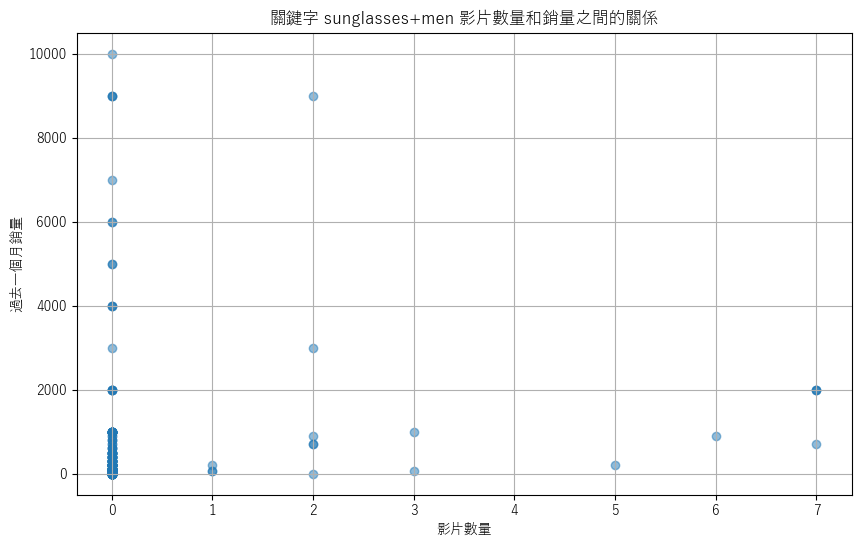

In [11]:
# 影片和過去一個月銷量的關係
plt.figure(figsize=(10, 6))
plt.scatter(df['有無影片'], df['過去一個月銷量'], alpha=0.5)
plt.title(f'關鍵字 {thing} 影片數量和銷量之間的關係')
plt.xlabel('影片數量')
plt.ylabel('過去一個月銷量')
plt.grid(True)
plt.show()

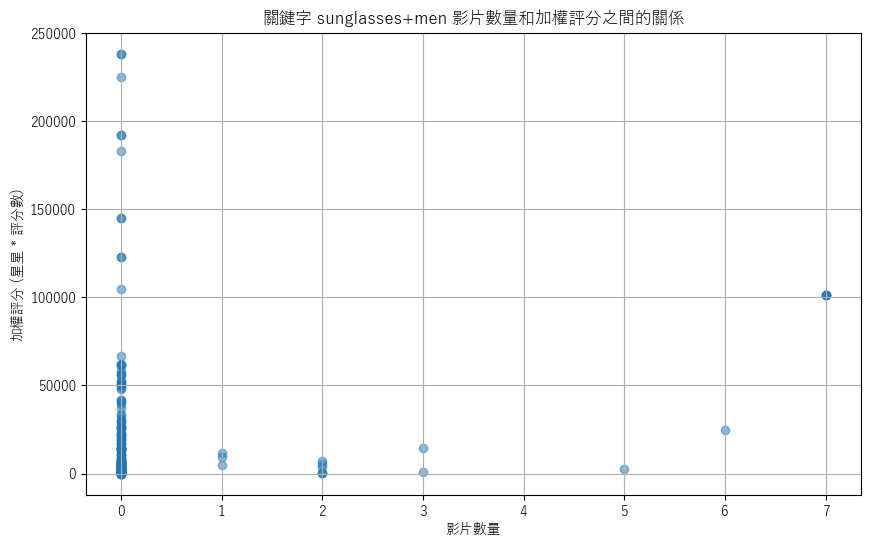

In [12]:
# 影片和加權評分的關係
plt.figure(figsize=(10, 6))
plt.scatter(df['有無影片'], df['加權評分'], alpha=0.5)
plt.title(f'關鍵字 {thing} 影片數量和加權評分之間的關係')
plt.xlabel('影片數量')
plt.ylabel('加權評分 (星星 * 評分數)')
plt.grid(True)
plt.show()

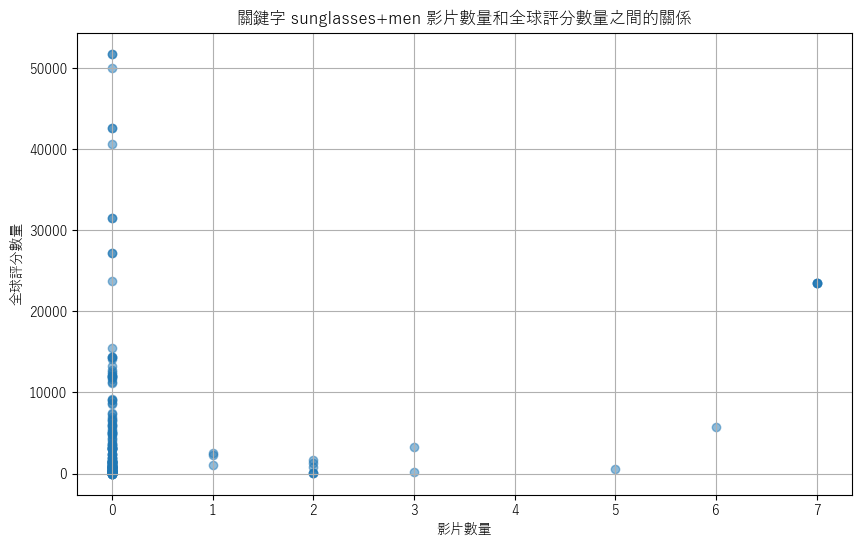

In [13]:
# 影片和評分數的關係
plt.figure(figsize=(10, 6))
plt.scatter(df['有無影片'], df['全球評分數量'], alpha=0.5)
plt.title(f'關鍵字 {thing} 影片數量和全球評分數量之間的關係')
plt.xlabel('影片數量')
plt.ylabel('全球評分數量')
plt.grid(True)
plt.show()

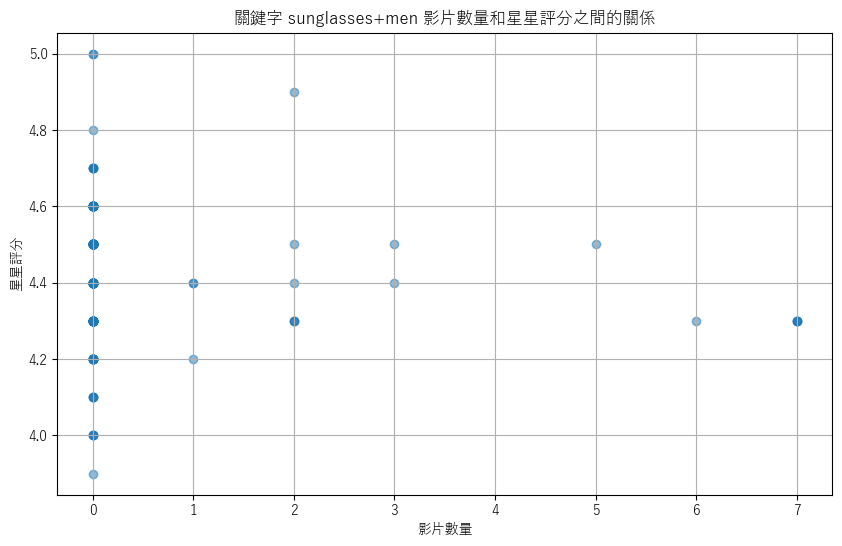

In [14]:
# 影片和評分數的關係
plt.figure(figsize=(10, 6))
plt.scatter(df['有無影片'], df['星星評分'], alpha=0.5)
plt.title(f'關鍵字 {thing} 影片數量和星星評分之間的關係')
plt.xlabel('影片數量')
plt.ylabel('星星評分')
plt.grid(True)
plt.show()